In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./datasets/UpdatedResumeDataSet.csv")

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
print(df.loc[10,'Resume'])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

### Separate the input and output data

In [5]:
x = df["Resume"]
y = df["Category"]

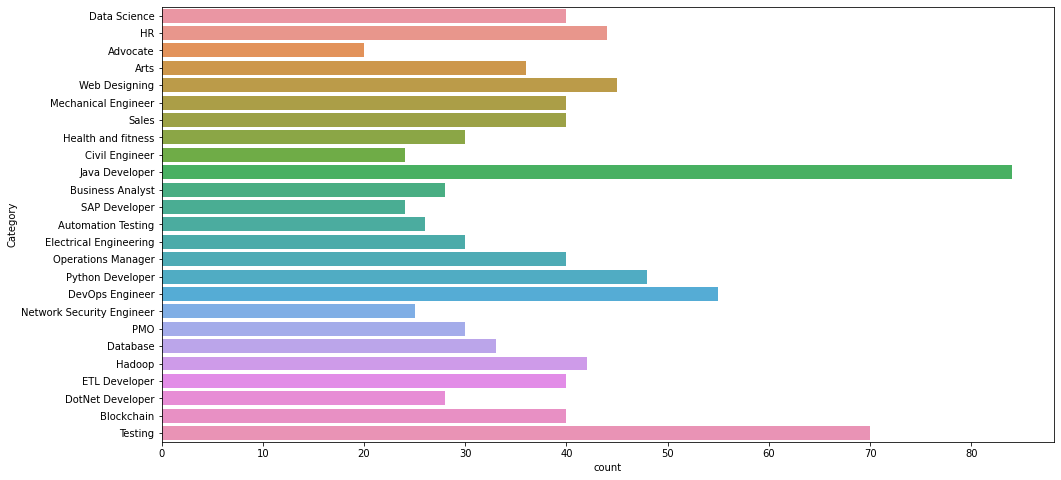

In [6]:
plt.figure(figsize=(16,8))
sns.countplot(y=y);

In [7]:
y.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Sales                        40
ETL Developer                40
Operations Manager           40
Mechanical Engineer          40
Blockchain                   40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

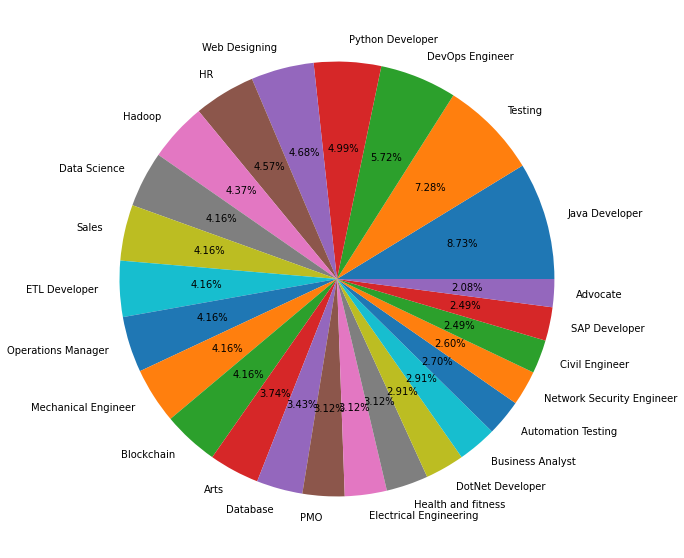

In [8]:
plt.figure(figsize=(10,10))
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

In [9]:
import re
import string

In [10]:
def CleanResume(rt):
    rt = re.sub("'http\S+\s*",' ',rt)
    rt = re.sub("RT|cc",' ',rt)
    rt = re.sub("#\S+",' ',rt)
    rt = re.sub("@\S+",' ',rt)
    rt = re.sub("[%s]" % re.escape(string.punctuation),' ',rt)
    rt = re.sub(r"[^\x00-\x7f]",r' ',rt)
    rt = re.sub("\s+",' ',rt)
    return rt


In [11]:
cleanedrt = CleanResume(x[0])

In [12]:
cleanedrt

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [13]:
cleandata=''
for i in range(900):
    cleandata += CleanResume(x[i])

len(cleandata)

2699751

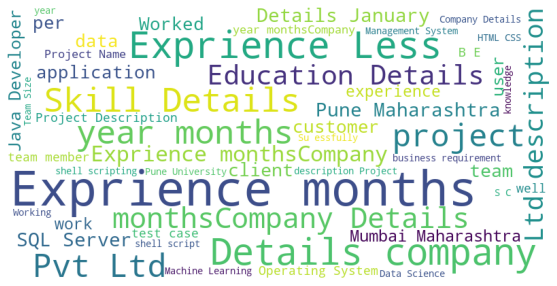

In [14]:
from wordcloud import WordCloud

word_Spam = WordCloud(width=800, height=400, background_color="white",max_words=50).generate(cleandata)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_Spam)
plt.axis("off")  
plt.show()

In [15]:
cleaned = x.apply(CleanResume)

### TF*IDF vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(stop_words="english")

In [18]:
x_new = tfidf.fit_transform(cleaned)
x_new.shape

(962, 7354)

In [19]:
tfidf.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

### Cross validation

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x_new, y, random_state=0)

In [22]:
x_train.shape

(721, 7354)

In [23]:
x_test.shape

(241, 7354)

### Build the Model Nearestcentroid

In [24]:
from sklearn.neighbors import NearestCentroid

nc = NearestCentroid()
nc.fit(x_train,y_train)

NearestCentroid()

In [25]:
len(nc.centroids_)

25

### Performance Evaluation

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score ,classification_report

In [27]:
y_pred = nc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9875518672199171

<Figure size 1440x648 with 0 Axes>

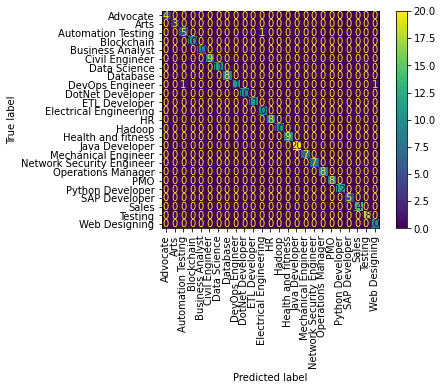

In [28]:
plt.figure(figsize=(20,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);
plt.xticks(rotation=90);

In [29]:
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       0.83      0.83      0.83         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00        10
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.85      0.92        13
         DotNet Developer       1.00      1.00      1.00        10
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       0.91      1.00      0.95        10
                       HR       1.00      1.00      1.00         8
                   Hadoop       1.00      1.00      1.00     

### Prediction on unseen data

In [30]:
with open("./datasets/Sample_resume.txt","r") as f:
    unseen_data = f.read()
# unseen_data

In [31]:
clean_unseen = CleanResume(unseen_data)
# clean_unseen

In [32]:
resume_tfidf = tfidf.transform([clean_unseen])
resume_tfidf.shape

(1, 7354)

In [33]:
nc.predict(resume_tfidf)

array(['Data Science'], dtype=object)